# **Assignment 1**



## **1. Prepocessing Data** : Data Cleaning
> Sebelum melakukan analisis data, dilakukan terlebih dahulu langkah prepocessing data agar data yang akan dianalisis sudah cukup baik sehingga tidak terjadi *garbage in* dan *garbage out*.
>> lakukan penginputan package numpy dan pandas untuk mempermudah proses prepocessing data.

In [27]:
import numpy as np 
import pandas as pd 
from os import path
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

> Pertama, lakukan input data dengan format csv menggunakan pd.read_csv 

In [4]:
data = pd.read_csv("dataset/london_crime_by_lsoa.csv")

In [5]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
data.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


### Melihat Missing value
dilakukan pencarian apakah terdapat data hilang (*Standard missing value*) menggunakan pandas.

In [7]:
missing_values = ["n/a", "na", "--"]

In [9]:
df = pd.read_csv("dataset/london_crime_by_lsoa.csv", na_values = missing_values)

In [10]:
df[['lsoa_code','borough','major_category','minor_category','value','year','month']]

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [11]:
df[['lsoa_code','borough','major_category','minor_category','value','year','month']].isnull()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13490599,False,False,False,False,False,False,False
13490600,False,False,False,False,False,False,False
13490601,False,False,False,False,False,False,False
13490602,False,False,False,False,False,False,False


In [12]:
# Summarizing Missing Values
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [13]:
df.isnull().values.any()

False

In [14]:
df.isnull().sum().sum()

0

> Tidak Terdapat Nilai Hilang (Missing value) pada data london_crime_by_lsoa. 
> Selanjutnya dilakukan pengecekan apakah data memiliki nilai duplikat atau tidak.


### *Identify Rows yang memiliki Duplicate Data*

In [15]:
dup = df.duplicated()
dup

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Length: 13490604, dtype: bool

In [16]:
# report if there are any duplicates 
print(dup.any())

False


In [17]:
# list all duplicate rows 
print(df[dup])
print(df.shape)

Empty DataFrame
Columns: [lsoa_code, borough, major_category, minor_category, value, year, month]
Index: []
(13490604, 7)


> Tidak Terdapat duplikasi Data.
> Setelah dilakukan tahapan preprocessing, akan dilakukan visualisasi sederhana menggunakan library yang disediakan python. 

## **2. Area Plot** 
> visualisasi pertama yang dilakukan adalah membuat area plot.

In [18]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.3


In [19]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [24]:
data2 = data.groupby("year", sort=False)["value"].sum()
data2

year
2016    736121
2015    711624
2014    680183
2013    686407
2012    737329
2011    724915
2010    715324
2009    717214
2008    738641
Name: value, dtype: int64

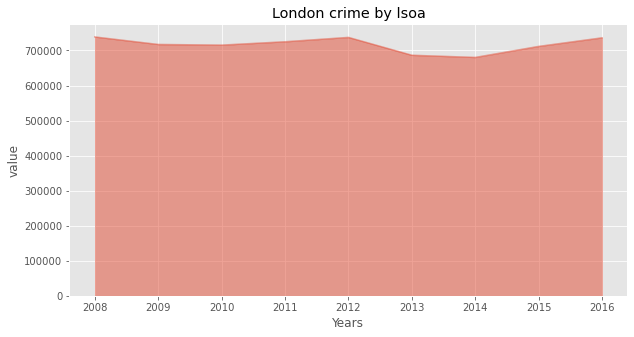

In [25]:
data2.plot(kind='area', 
             stacked=False,
             figsize=(10, 5), # pass a tuple (x, y) size
             )


plt.title('London crime by lsoa')
plt.ylabel('value')
plt.xlabel('Years')

plt.show()

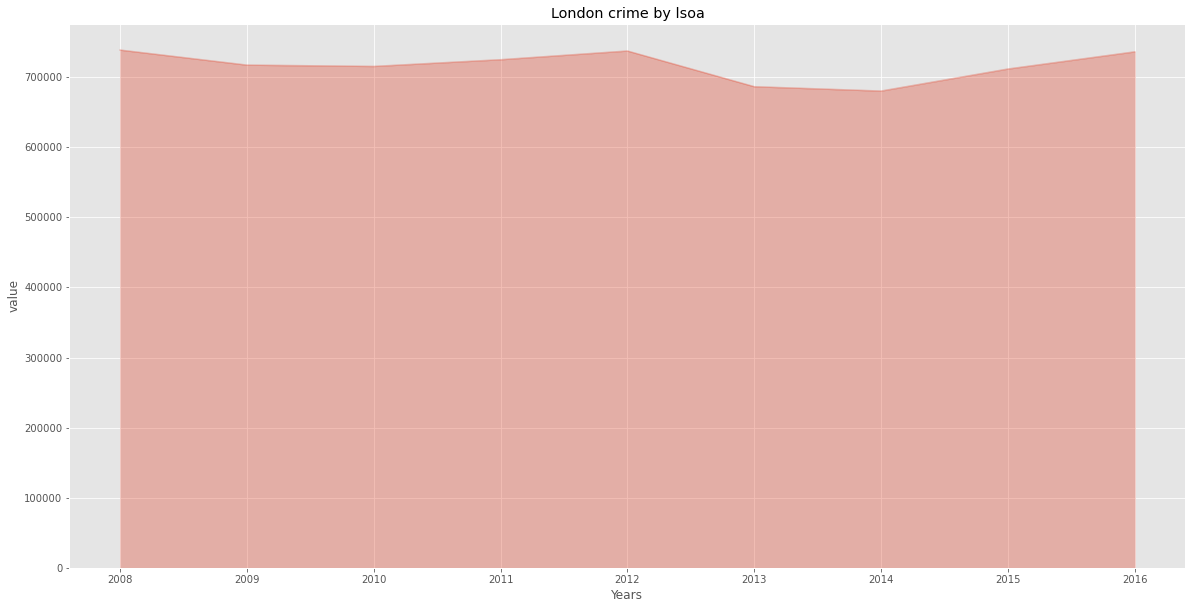

In [26]:
data2.plot(kind='area', 
             alpha=0.35, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('London crime by lsoa')
plt.ylabel('value')
plt.xlabel('Years')

plt.show()

Berdasarkan plot area yang dihasilkan di atas dengan judul London Crime by lsoa menunjukkan bahwa value tertinggi untuk kasus crime di Londondari kurun watu 2008 hingga 206 terjadi pada tahun 2008, 2012 dan 2016. Plot area ini menunjukkan volume dari kasus crime yang terjadi di London yang ditunjukkan oleh bagian terarsih di bawah grafik yang menunjukan total kasus crime di London dari tahun 2008 hingga tahun 2016. 

## **3. Histogram**

In [133]:
dt1= data.loc[(data['borough'] == "Wandsworth") & (data.major_category == "Robbery")]
dt11= dt1.drop('minor_category',axis=1)
dt12= dt11.drop('lsoa_code',axis=1)

dt2= dt12.groupby('year').sum()
dt21= dt2.drop('month',axis=1)
dt22= dt21.rename(columns={'value':'Wandsworth'})
dt22

,Wandsworth
year,
2008,1030
2009,1172
2010,1186
2011,1212
2012,1198
2013,943
2014,598
2015,450
2016,609


In [112]:
dt3= data.loc[(data['borough'] == "Greenwich") & (data.major_category == "Robbery")]
dt31= dt3.drop('minor_category',axis=1)
dt32= dt31.drop('lsoa_code',axis=1)

dt4= dt32.groupby('year').sum()
dt41= dt4.drop('month',axis=1)
dt42= dt41.rename(columns={'value':'Greenwich'})
dt42


,Greenwich
year,
2008,898
2009,680
2010,711
2011,741
2012,580
2013,471
2014,399
2015,464
2016,486


In [120]:
dt5 = {"Wandswoth" : [1030, 1172, 1186, 1212, 1198, 948, 598, 450, 609]}
dt5 = pd.DataFrame(dt5)
dt51= dt5.assign(Greenwich = [898, 680, 711, 741, 580, 471, 399, 464, 486])
dt51

,Wandswoth,Greenwich
0,1030,898
1,1172,680
2,1186,711
3,1212,741
4,1198,580
5,948,471
6,598,399
7,450,464
8,609,486


In [121]:
years = list(map(str, range(2008, 2017)))
years

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

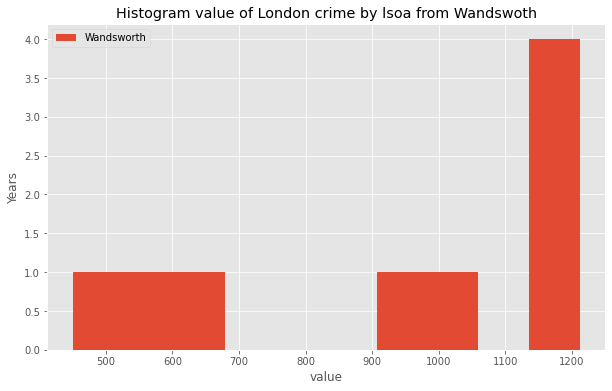

In [202]:
dt22.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram value of London crime by lsoa from Wandswoth')
plt.ylabel('Years')
plt.xlabel('value')

plt.show()

Berdasarkan Histrogram di atas yang berjudul Histogram value of London crime by lsoa from Wandswoth, kita dapat mengetahui sebaran data untuk kasus crime di Wandswoth dari dataset London_crime_by_lsoa.

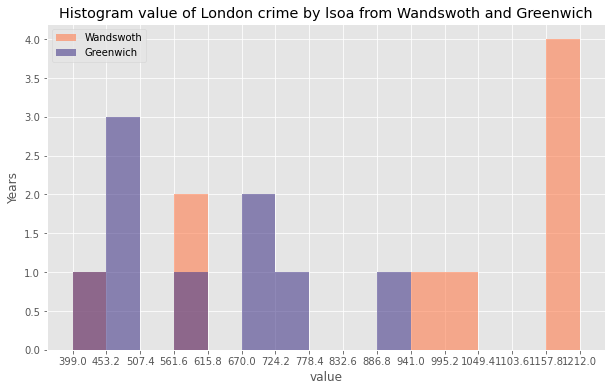

In [124]:
# let's get the x-tick values
count, bin_edges = np.histogram(dt51, 15)

# un-stacked histogram
dt1.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram value of London crime by lsoa from Wandswoth and Greenwich')
plt.ylabel('Years')
plt.xlabel('value')

plt.show()

Berdasarkan Histrogram di atas yang berjudul Histogram value of London crime by lsoa from Wandswoth, kita dapat mengetahui sebaran data untuk kasus crime di Wandswoth and Greenwich dari dataset London_crime_by_lsoa.

## **4. Pie Chart**

In [39]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.3


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


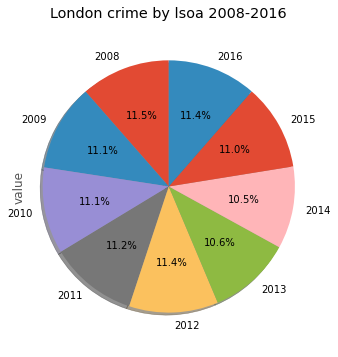

In [40]:
# step 1 : gather data
# group data by year and apply sum() function 
df_year = data.groupby('year', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(data.groupby('year', axis=0)))

df_year.head()
# step 2 : Plot the Data
# autopct create %, start angle represent starting point
df_year['value'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('London crime by lsoa 2008-2016')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()


Berdasarkan output yang dihasilkan di atas, terbentuk diagram lingkaran sederhana yang didalamnya menunjukkan persentase total kasus crime di London. terdapat 11.5% dari keseluruhan value yang ada terjadi pada tahun 2008, 11.1% dari keseluruhan value yang ada terjadi pada tahun 2009, 11.5% dari keseluruhan value yang ada terjadi pada tahun 2010, 11.2% dari keseluruhan value yang ada terjadi pada tahun 2011, 11.4% dari keseluruhan value yang ada terjadi pada tahun 2012, 11.6% dari keseluruhan value yang ada terjadi pada tahun 2013, 10.5% dari keseluruhan value yang ada terjadi pada tahun 2014, 11.0% dari keseluruhan value yang ada terjadi pada tahun 2014 dan 11.4% dari keseluruhan value yang ada terjadi pada tahun 2016.

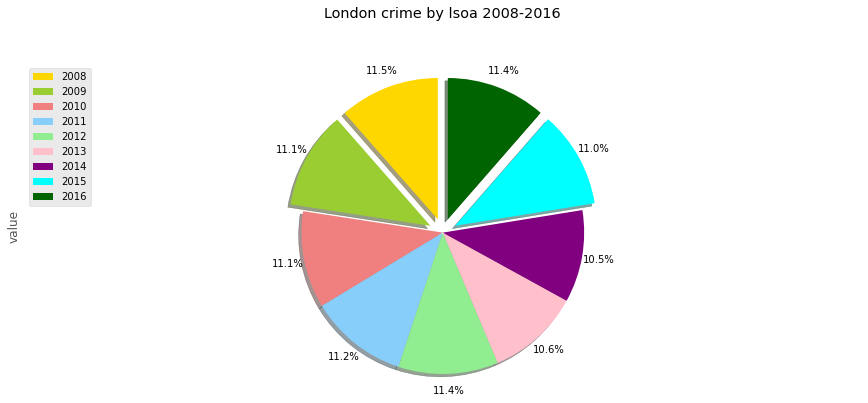

In [41]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','purple','cyan','darkgreen','blue']
explode_list = [0.1, 0.1, 0, 0, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_year['value'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('London crime by lsoa 2008-2016', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_year.index, loc='upper left') 

plt.show()

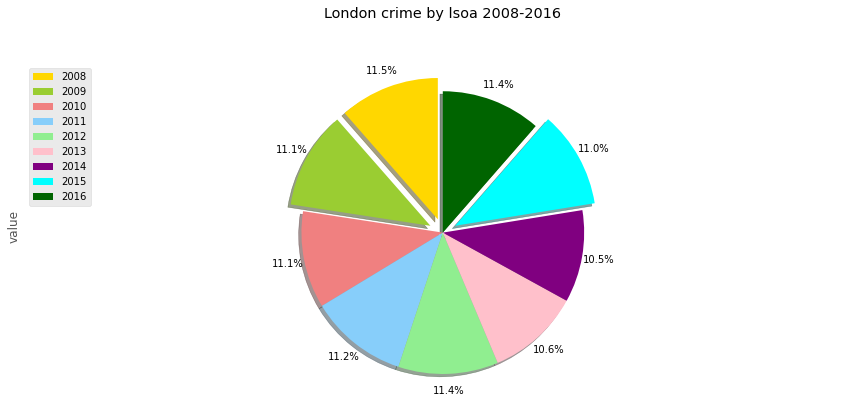

In [66]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','purple','cyan','darkgreen','blue']
explode_list = [0.1, 0.1, 0 , 0, 0, 0, 0, 0.1, 0] # ratio for each continent with which to offset each wedge.

df_year['value'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,        
                            pctdistance=1.12,    
                            colors=colors_list,
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('London crime by lsoa 2008-2016', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_year.index, loc='upper left') 

plt.show()

Berdasarkan 2 output yang dihasilkan di atas, terbentuk diagram lingkaran yang lebih berwarna dengan beberapa tools tambahan untuk membuat pie chart ini terlihat lebih menarik. Kedua piechart di atas, menunjukkan persentase total kasus crime di London. terdapat 11.5% dari keseluruhan value yang ada terjadi pada tahun 2008, 11.1% dari keseluruhan value yang ada terjadi pada tahun 2009, 11.5% dari keseluruhan value yang ada terjadi pada tahun 2010, 11.2% dari keseluruhan value yang ada terjadi pada tahun 2011, 11.4% dari keseluruhan value yang ada terjadi pada tahun 2012, 11.6% dari keseluruhan value yang ada terjadi pada tahun 2013, 10.5% dari keseluruhan value yang ada terjadi pada tahun 2014, 11.0% dari keseluruhan value yang ada terjadi pada tahun 2014 dan 11.4% dari keseluruhan value yang ada terjadi pada tahun 2016.

In [42]:
df_major = data.groupby('major_category', axis=0).sum()

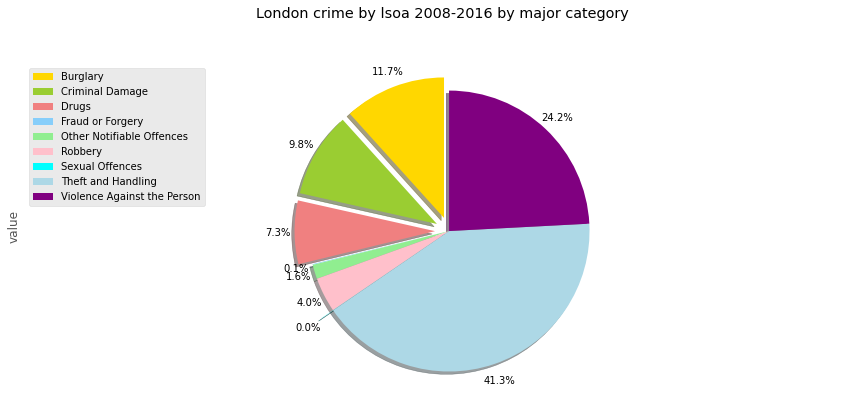

In [43]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','cyan', 'lightblue', 'purple']
explode_list = [0.1, 0.1, 0.1, 0, 0, 0, 0.1, 0, 0]

df_major['value'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list,
                            explode=explode_list  
                            )

# scale the title up by 12% to match pctdistance
plt.title('London crime by lsoa 2008-2016 by major category', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_major.index, loc='upper left') 

plt.show()

Berdasarkan output yang dihasilkan di atas, terbentuk diagram lingkaran sederhana yang didalamnya menunjukkan persentase total kasus crime berdasarkan mayor category. Tedapat 11.7% dari keseluruhan value yang ada termasuk ke dalam kasus burglary, 9.8% dari keseluruhan value yang ada termasuk ke dalam kasus Criminal Damage, 7.3% dari keseluruhan value yang ada termasuk ke dalam kasus Drugs, 0.0% dari keseluruhan value yang ada termasuk ke dalam kasus Sexual offence, 0.1% dari keseluruhan value yang ada termasuk ke dalam kasus Fraud or Forgery , 1.6% dari keseluruhan value yang ada termasuk ke dalam kasus Other Notifiable Offences, 4.0 % dari keseluruhan value yang ada termasuk ke dalam kasus Robbers, 41.3 % dari keseluruhan value yang ada termasuk ke dalam kasus Theif and Handling, san 24.2 % dari keseluruhan value yang ada termasuk ke dalam kasus violence agains the person. 

In [44]:
df_minor = data.groupby('minor_category', axis=0).sum()

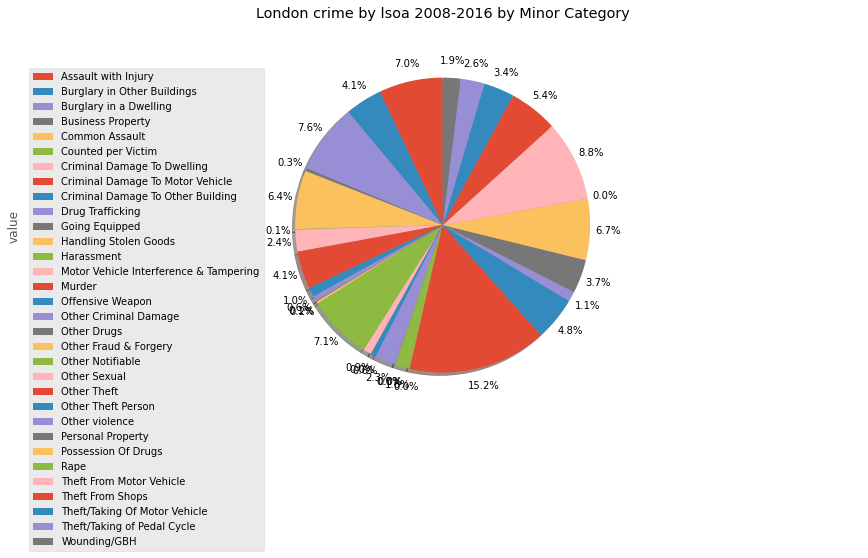

In [45]:
df_minor['value'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,      
                            )

# scale the title up by 12% to match pctdistance
plt.title('London crime by lsoa 2008-2016 by Minor Category', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_minor.index, loc='upper left') 

plt.show()

Berdasarkan output yang dihasilkan di atas, terbentuk diagram lingkaran sederhana yang didalamnya menunjukkan persentase total kasus crime berdasarkan minor category.

## **5. Box Plot**

In [82]:
dt1= df.loc[(data['borough'] == "Wandsworth") & (data.major_category == "Robbery")]
dt11= dt1.drop('minor_category',axis=1)
dt12= dt11.drop('lsoa_code',axis=1)

dt2= dt12.groupby('year').sum()
dt21= dt2.drop('month',axis=1)
dt22= dt21.rename(columns={'value':'Wandsworth'})
dt22

,Wandsworth
year,
2008,1030
2009,1172
2010,1186
2011,1212
2012,1198
2013,943
2014,598
2015,450
2016,609


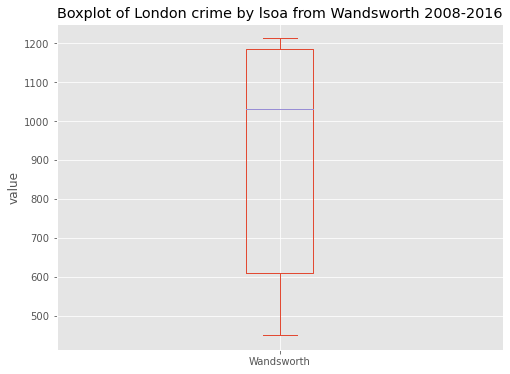

In [204]:
dt22.plot(kind='box', figsize=(8, 6))

plt.title('Boxplot of London crime by lsoa from Wandsworth 2008-2016')
plt.ylabel('value')

plt.show()

Berdasarkan outut boxplot dengan judul Boxplot of London crime by lsoa from Wandsworth 2008-2016 dapat dilihat bahwa persebaran kasus kriminal yang terjadi di wilayah Wandsworth tidak simetris dan cenderung menuju bagian atas atau disebut skewness positif.

In [143]:
dt22.describe()

,Wandsworth
count,9.000000
mean,933.111111
std,301.909525
min,450.000000
25%,609.000000
50%,1030.000000
75%,1186.000000
max,1212.000000


Dari data London crime by lsoa from Wandsworth 2008-2016 diketahui nilai rata-ratanya sebayak 933.1 kasus, nilai standar deviasi sebesar 301.9, nilai minimum 450 dan maksimum sebesar 1212 kasus.

## **6. Scatter Plot**

In [206]:
dt5 = {"Year": [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
    "Greenwich" : [898, 680, 711, 741, 580, 471, 399, 464, 486]}
dt5= pd.DataFrame(dt5)
dt5

,Year,Greenwich
0,2008,898
1,2009,680
2,2010,711
3,2011,741
4,2012,580
5,2013,471
6,2014,399
7,2015,464
8,2016,486


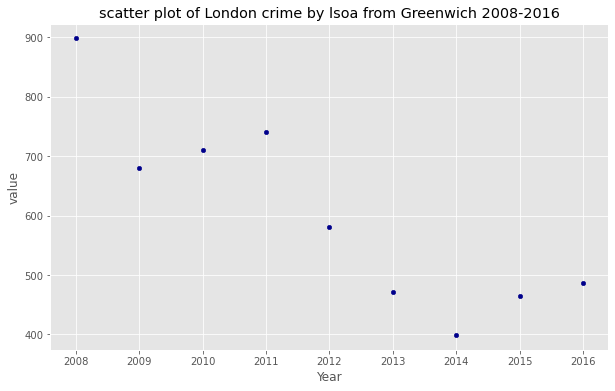

In [207]:
dt5.plot(kind='scatter', x='Year', y='Greenwich', figsize=(10, 6), color='darkblue')

plt.title('scatter plot of London crime by lsoa from Greenwich 2008-2016')
plt.xlabel('Year')
plt.ylabel('value')

plt.show()

Berdasarkan output scatter plot yang dihasilkan di atas untuk data London crime by lsoa from Greenwich tahun 2008 sampai 2016. dari scatter plot yang dihasilakan data tidak menunjukkan kelinieran.

## **7. Word Clouds**

In [4]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes

!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [5]:
comment_words = ''
stopwords = set(STOPWORDS)

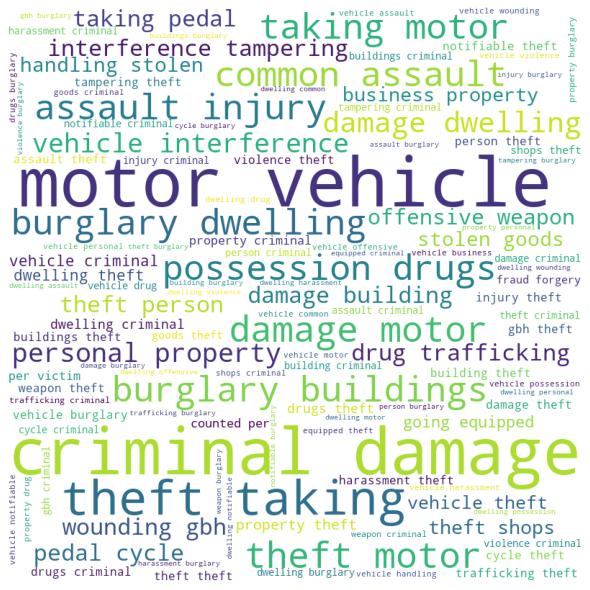

In [24]:
# plot the WordCloud image                      
plt.figure(figsize = (20, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [26]:
# open the file and read it into a variable alice_novel
minor_cat = open('minor.txt','r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


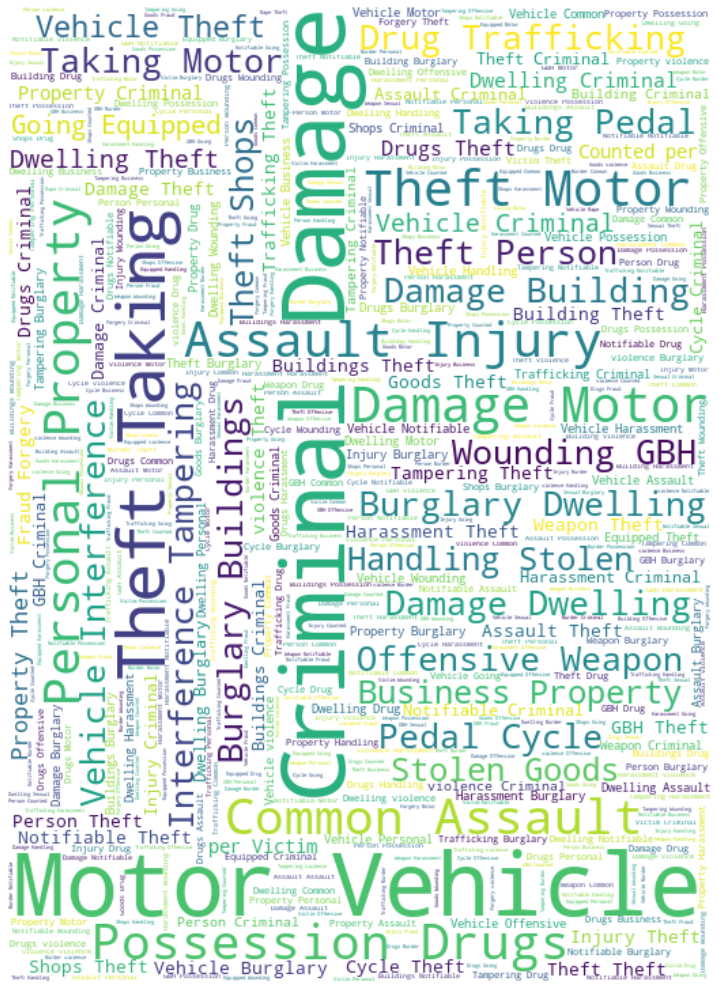

In [31]:
stopwords.add('said')

# generate the word cloud
crime_wc.generate(minor_cat)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
crime_mask = np.array(Image.open('crime_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


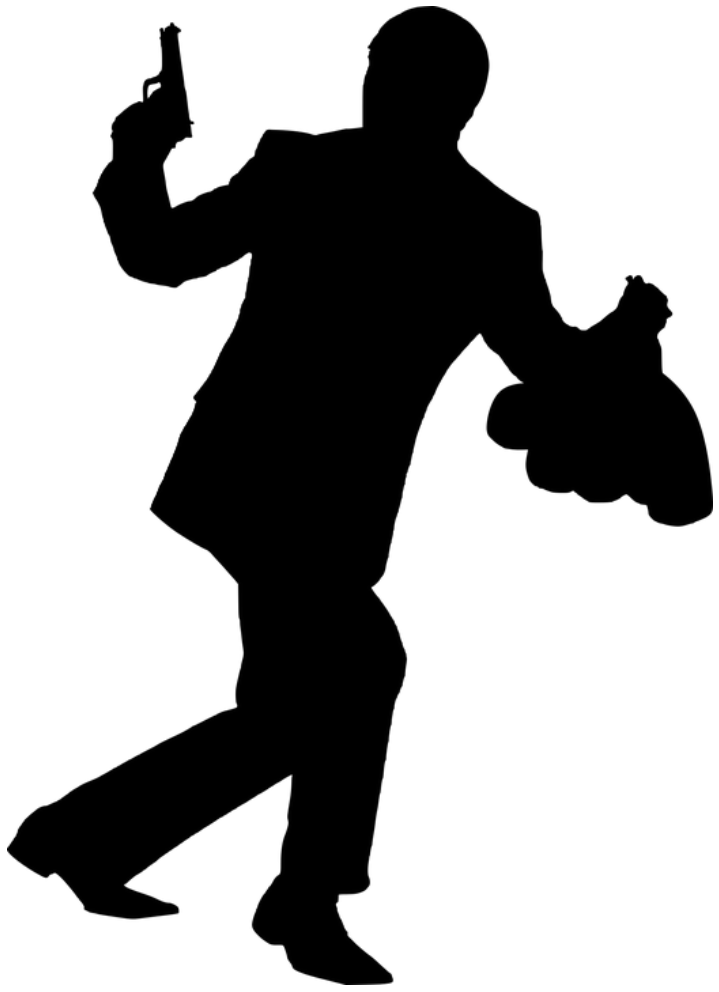

In [36]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(crime_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Untuk penggunaan latar pada word cloud tidak dapat dilakukan run syntax pada device saya. 

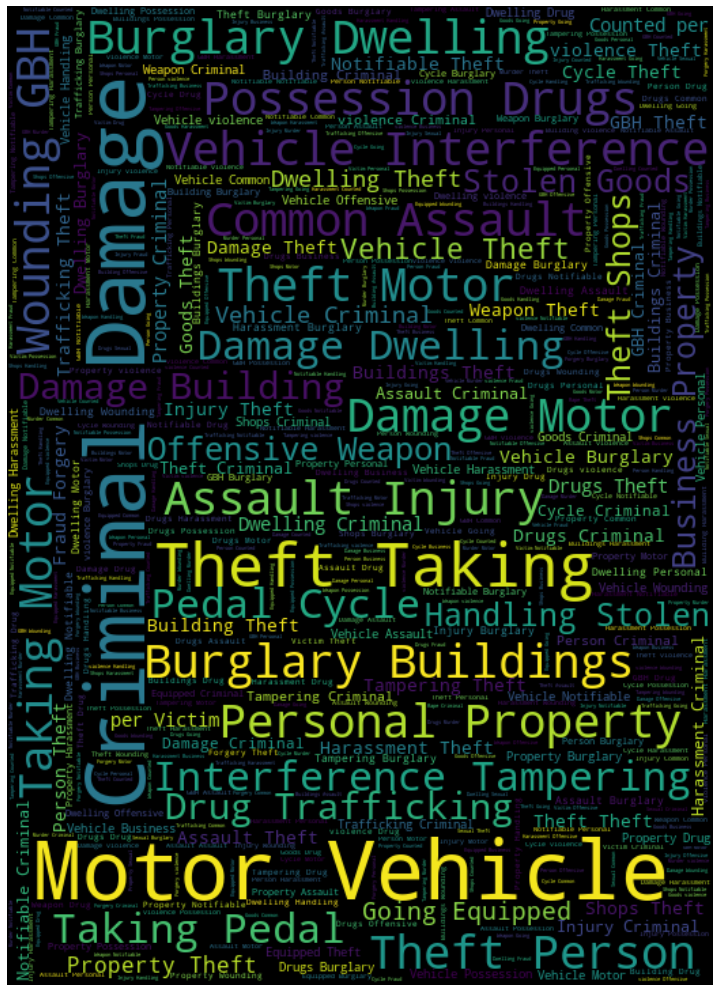

In [37]:
# instantiate a word cloud object
crime_wc = WordCloud(background_color='black', max_words=2000, mask=crime_mask, stopwords=stopwords)

# generate the word cloud
crime_wc.generate(minor_cat)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Dapat dilihat dari visualisasi menggunakan word cloud, untuk kata yang mucul pada variabel minor category dari dataset london_crime_by lsoa terdapat kata criminal Damage, Motor Vehicle, Theft person, Thef Taking, Taking motor, Wonding, GBH, Vehicle Inference, dan lain sebagainya.

## **8. Folium Maps**

In [165]:
#!conda install -c conda-forge folium=0.5.0 --yes
#!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [209]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [167]:
data.shape

(13490604, 7)

In [168]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
dataw = data.iloc[0:limit, :]

In [169]:
# London latitude and langitude values
latitude = 51.509865
longitude = -0.118092

In [208]:
# create map and display it
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
london_map

In [ ]:
dt1= df.loc[(data['borough'] == "Wandsworth") & (data.major_category == "Robbery")]
dt11= dt1.drop('minor_category',axis=1)
dt12= dt11.drop('lsoa_code',axis=1)

dt2= dt12.groupby('year').sum()
dt21= dt2.drop('month',axis=1)
dt22= dt21.rename(columns={'value':'Wandsworth'})
dt22

In [189]:
dta = pd.read_csv("dataset/london_crime_by_lsoa.csv")

In [176]:
dta.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [190]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
dta.drop(['lsoa_code','major_category','minor_category','month'], axis=1, inplace=True)

# for sake of consistency, let's also make all column labels of type string
dta.columns = list(map(str, dta.columns))

# add total column
dta['year'] = dta.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(2008, 2017)))
print ('data dimensions:', dta.shape)

data dimensions: (13490604, 3)


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7744/1980203727.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dta['year'] = dta.sum(axis=1)


In [192]:
dta.head()

,borough,value,year
0,Croydon,0,2016
1,Greenwich,0,2016
2,Bromley,0,2015
3,Redbridge,0,2016
4,Wandsworth,0,2008


Berdasarkan penggunaan library folium di atas, dapat dilihat peta untuk London yang terdapat pada "london_map" yang dihasilkan. Dengan package folium ini, kita dapat pula digunakan untuk melihat persebaran kasus kriminal yang terjadi di London baik dari letak titik-titik yang terjadi kasus dan persebaran tinggi dan rendahnya tingkat kriminal di berbagai wilayah London khususnya dari dataset ini yang dapat dilihat dari tahun 2008 hingga tahun 2016.

# **KESIMPULAN**

Berdasarkan langkah yang telah dilakukan analisis data alangkah lebih baiknya dilakukan proses prepocessing data seperti data cleaning untuk memastikan tidak adanya missing value, duplicate dan beberapa data kotor agar tidak menyebabkan garbage out yang disebabkan oleh garbage in. Dari beberapa visualisasi data yang dilakukan, dapat disimpulkan bahwa dataset London Crime by lsoa 2008-2016 dapat dilakukan dengan berbagai macam grafik dan plot yang dibuat menggunakan library pandas, matplotlib, worcloud, dan folium seperti, plot area, histogram, pie chart, boxplot, scatter plot, wor cloud, dan World map.